In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

# We have an irish song 
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# We do all the pre-processing
corpus = data.lower().split("\n") # will lower and make a lit with all the words

tokenizer.fit_on_texts(corpus) # will create the dictionary of words
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [4]:
input_sequences = []
for line in corpus:
    # for each line in the corpus will generate a token list using the
    # tokenizers text to sequences method. This will convert a line of text 
    # into a list of the tokens representing the words
    
    token_list = tokenizer.texts_to_sequences([line])[0]
    # Then we will iterate over the list of tokens and create a number of 
    # n_fram_sequences namely the first two words in the sentence or one sequence
    # then the first three in another sequence. THis for each squence
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        # As a result we have the sentences beign broken one word each time

# pad sequences 
# qe look for the longest sentence in the corpus 
max_sequence_len = max([len(x) for x in input_sequences])
# once we have it we pad all the sequence to have the same length 
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
#ALl we have to do is to take all but the last character as the x and then use the last 
# character as the y on our label 
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [5]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [6]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [7]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [10]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)


Epoch 1/500
15/15 [==============================] - 5s 13ms/step - loss: 5.5686 - accuracy: 0.0243
Epoch 2/500
15/15 [==============================] - 0s 14ms/step - loss: 5.5452 - accuracy: 0.0486
Epoch 3/500
15/15 [==============================] - 0s 14ms/step - loss: 5.4834 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 13ms/step - loss: 5.2983 - accuracy: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 13ms/step - loss: 5.1409 - accuracy: 0.0486
Epoch 6/500
15/15 [==============================] - 0s 14ms/step - loss: 5.0838 - accuracy: 0.0486
Epoch 7/500
15/15 [==============================] - 0s 12ms/step - loss: 5.0413 - accuracy: 0.0530
Epoch 8/500
15/15 [==============================] - 0s 13ms/step - loss: 5.0130 - accuracy: 0.0552
Epoch 9/500
15/15 [==============================] - 0s 14ms/step - loss: 4.9832 - accuracy: 0.0618
Epoch 10/500
15/15 [==============================] - 0s 12ms/step - loss: 4.9450 - accuracy: 0.0508

15/15 [==============================] - 0s 12ms/step - loss: 2.3407 - accuracy: 0.5607
Epoch 83/500
15/15 [==============================] - 0s 11ms/step - loss: 2.3128 - accuracy: 0.5762
Epoch 84/500
15/15 [==============================] - 0s 12ms/step - loss: 2.2833 - accuracy: 0.5982
Epoch 85/500
15/15 [==============================] - 0s 12ms/step - loss: 2.2636 - accuracy: 0.5960
Epoch 86/500
15/15 [==============================] - 0s 13ms/step - loss: 2.2386 - accuracy: 0.5938
Epoch 87/500
15/15 [==============================] - 0s 13ms/step - loss: 2.2214 - accuracy: 0.6203
Epoch 88/500
15/15 [==============================] - 0s 11ms/step - loss: 2.2117 - accuracy: 0.6336
Epoch 89/500
15/15 [==============================] - 0s 13ms/step - loss: 2.1772 - accuracy: 0.6225
Epoch 90/500
15/15 [==============================] - 0s 11ms/step - loss: 2.1601 - accuracy: 0.6093
Epoch 91/500
15/15 [==============================] - 0s 12ms/step - loss: 2.1510 - accuracy: 0.6468
Epo

15/15 [==============================] - 0s 11ms/step - loss: 0.9901 - accuracy: 0.8764
Epoch 163/500
15/15 [==============================] - 0s 11ms/step - loss: 0.9800 - accuracy: 0.8742
Epoch 164/500
15/15 [==============================] - 0s 13ms/step - loss: 0.9636 - accuracy: 0.8764
Epoch 165/500
15/15 [==============================] - 0s 12ms/step - loss: 0.9488 - accuracy: 0.8808
Epoch 166/500
15/15 [==============================] - 0s 12ms/step - loss: 0.9389 - accuracy: 0.8874
Epoch 167/500
15/15 [==============================] - 0s 11ms/step - loss: 0.9274 - accuracy: 0.8852
Epoch 168/500
15/15 [==============================] - 0s 11ms/step - loss: 0.9182 - accuracy: 0.8896
Epoch 169/500
15/15 [==============================] - 0s 11ms/step - loss: 0.9142 - accuracy: 0.8896
Epoch 170/500
15/15 [==============================] - 0s 11ms/step - loss: 0.9067 - accuracy: 0.8874
Epoch 171/500
15/15 [==============================] - 0s 12ms/step - loss: 0.8935 - accuracy: 0

15/15 [==============================] - 0s 13ms/step - loss: 0.4640 - accuracy: 0.9338
Epoch 243/500
15/15 [==============================] - 0s 12ms/step - loss: 0.4626 - accuracy: 0.9294
Epoch 244/500
15/15 [==============================] - 0s 11ms/step - loss: 0.4567 - accuracy: 0.9338
Epoch 245/500
15/15 [==============================] - 0s 11ms/step - loss: 0.4512 - accuracy: 0.9338
Epoch 246/500
15/15 [==============================] - 0s 12ms/step - loss: 0.4478 - accuracy: 0.9316
Epoch 247/500
15/15 [==============================] - 0s 12ms/step - loss: 0.4425 - accuracy: 0.9294
Epoch 248/500
15/15 [==============================] - 0s 13ms/step - loss: 0.4390 - accuracy: 0.9338
Epoch 249/500
15/15 [==============================] - 0s 12ms/step - loss: 0.4346 - accuracy: 0.9360
Epoch 250/500
15/15 [==============================] - 0s 13ms/step - loss: 0.4317 - accuracy: 0.9338
Epoch 251/500
15/15 [==============================] - 0s 11ms/step - loss: 0.4275 - accuracy: 0

15/15 [==============================] - 0s 13ms/step - loss: 0.3546 - accuracy: 0.9272
Epoch 323/500
15/15 [==============================] - 0s 15ms/step - loss: 0.3335 - accuracy: 0.9316
Epoch 324/500
15/15 [==============================] - 0s 14ms/step - loss: 0.3167 - accuracy: 0.9360
Epoch 325/500
15/15 [==============================] - 0s 19ms/step - loss: 0.2963 - accuracy: 0.9426
Epoch 326/500
15/15 [==============================] - 0s 18ms/step - loss: 0.2912 - accuracy: 0.9448
Epoch 327/500
15/15 [==============================] - 0s 15ms/step - loss: 0.2841 - accuracy: 0.9426
Epoch 328/500
15/15 [==============================] - 0s 17ms/step - loss: 0.2818 - accuracy: 0.9404
Epoch 329/500
15/15 [==============================] - 0s 15ms/step - loss: 0.2766 - accuracy: 0.9448
Epoch 330/500
15/15 [==============================] - 0s 17ms/step - loss: 0.2719 - accuracy: 0.9470
Epoch 331/500
15/15 [==============================] - 0s 13ms/step - loss: 0.2695 - accuracy: 0

15/15 [==============================] - 0s 12ms/step - loss: 0.1830 - accuracy: 0.9492
Epoch 403/500
15/15 [==============================] - 0s 11ms/step - loss: 0.1827 - accuracy: 0.9514
Epoch 404/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1818 - accuracy: 0.9492
Epoch 405/500
15/15 [==============================] - 0s 14ms/step - loss: 0.1809 - accuracy: 0.9470
Epoch 406/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1805 - accuracy: 0.9514
Epoch 407/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1793 - accuracy: 0.9536
Epoch 408/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1786 - accuracy: 0.9536
Epoch 409/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1782 - accuracy: 0.9470
Epoch 410/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1774 - accuracy: 0.9514
Epoch 411/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1763 - accuracy: 0

15/15 [==============================] - 0s 11ms/step - loss: 0.1404 - accuracy: 0.9514
Epoch 483/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1400 - accuracy: 0.9536
Epoch 484/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1398 - accuracy: 0.9492
Epoch 485/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1387 - accuracy: 0.9514
Epoch 486/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1381 - accuracy: 0.9514
Epoch 487/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1370 - accuracy: 0.9514
Epoch 488/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1373 - accuracy: 0.9514
Epoch 489/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1365 - accuracy: 0.9514
Epoch 490/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1367 - accuracy: 0.9470
Epoch 491/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1363 - accuracy: 0

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

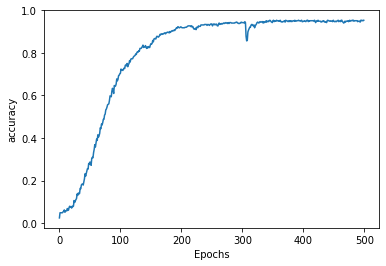

In [12]:
plot_graphs(history, 'accuracy')

In [13]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

/usr/local/lib64/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Laurence went to dublin the rows and the ructions of lanigans me up hearty ball of of miss kerrigan ground hearty away plenty were hearty his right painted glisten catchers daughter daughter glisten glisten glisten glisten glisten cask we eyes glisten bacon were up his right painted painted finnertys miss hoops glisten glisten glisten glisten glisten glisten youd were oh strangled glisten glisten glisten glisten together that strangled glisten glisten glisten together that painted miss strangled miss your eyes glisten glisten invitation glisten glisten glisten youd that glisten rose bacon were up his right painted painted miss finnertys hoops ask glisten glisten glisten glisten
